# 0 Initialise

### Import Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mimic_constants import *
from os import makedirs
from xgboost import XGBClassifier
from CardiomegalyBiomarkers.Cardiomegaly_Classification.src.xgboost_functions import SplitData, train_test_xgboost, SplitDataCorrectly

/home/ays124/mimic/venv/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


### Paths

In [2]:
# Path for model location and error graphs
model_folder = 'CardiomegalyBiomarkers/Cardiomegaly_Classification/models/xgboost_idp/'
makedirs(model_folder, exist_ok=True)

### Model Parameters

In [3]:
# Data parameters
TrainTestFractions = [0.8, 0.2] # Spits of data for training/validation and testing sets
FoldFractions = [0.1] * 10 # Spits of data for folds

# XGBoost parameters
eval_metric = 'logloss'
scale_pos_weight = 0.3/0.7
colsample_bytree = 0.75
gamma = 0
lr = 0.1
subsample = 0.75

max_depth_shallow = 3
max_depth_deep = 8

early_stopping = 15

In [4]:
# Feature selection for model
base = ['subject_id', 'hadm_id', 'stay_id', 'path'] # base features

bmrks = ['CTR', 'CPAR']     # biomarker features (BMRK)

variables = ['age_label'] + significant_variables[1:]

# Select modality combinations tested (list of lists)
modalities_combinations = [[variables, 'M_L_V'],
                           [bmrks, 'BMRK'], 
                           [variables + bmrks, 'M_L_V_BMRK']]

# 1 Data Prepocessing

In [5]:
# Read 
data = get_master_df(idp=True)
data = standardize_mimic_ethnicity(data)
data['age_label'] = data['anchor_age'].apply(lambda x: min(x / 100, 1))
# Change name of column to indicate class deoaration
data.rename(columns={'Cardiomegaly':'class'}, inplace=True)

[TrainVal_df, Test_df] = SplitDataCorrectly(data, TrainTestFractions)

# Split trainval into folds
[Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df] = SplitDataCorrectly(TrainVal_df, FoldFractions)

In [6]:
# Preprocess folds for xgboost use by selecting features and encoding categorical features
Fold1_df = pd.concat([Fold1_df[base + variables + bmrks], Fold1_df['class']], axis=1)
Fold2_df = pd.concat([Fold2_df[base + variables + bmrks], Fold2_df['class']], axis=1)
Fold3_df = pd.concat([Fold3_df[base + variables + bmrks], Fold3_df['class']], axis=1)
Fold4_df = pd.concat([Fold4_df[base + variables + bmrks], Fold4_df['class']], axis=1)
Fold5_df = pd.concat([Fold5_df[base + variables + bmrks], Fold5_df['class']], axis=1)
Fold6_df = pd.concat([Fold6_df[base + variables + bmrks], Fold6_df['class']], axis=1)
Fold7_df = pd.concat([Fold7_df[base + variables + bmrks], Fold7_df['class']], axis=1)
Fold8_df = pd.concat([Fold8_df[base + variables + bmrks], Fold8_df['class']], axis=1)
Fold9_df = pd.concat([Fold9_df[base + variables + bmrks], Fold9_df['class']], axis=1)
Fold10_df = pd.concat([Fold1_df[base + variables + bmrks], Fold10_df['class']], axis=1)

# Preprocess test set for xgboost use by selecting features and encoding categorical features
Test_df = pd.concat([Test_df[base + variables + bmrks], Test_df['class']], axis=1)

# 2 Model Training and Testing

[0]	validation_0-logloss:0.67790	validation_1-logloss:0.69547
[0]	validation_0-logloss:0.67790	validation_1-logloss:0.69547
[1]	validation_0-logloss:0.65929	validation_1-logloss:0.69046
[1]	validation_0-logloss:0.65929	validation_1-logloss:0.69046
[2]	validation_0-logloss:0.64047	validation_1-logloss:0.68447
[2]	validation_0-logloss:0.64047	validation_1-logloss:0.68447
[3]	validation_0-logloss:0.62173	validation_1-logloss:0.68263
[3]	validation_0-logloss:0.62173	validation_1-logloss:0.68263
[4]	validation_0-logloss:0.60240	validation_1-logloss:0.68193
[4]	validation_0-logloss:0.60240	validation_1-logloss:0.68193
[5]	validation_0-logloss:0.58793	validation_1-logloss:0.68277
[5]	validation_0-logloss:0.58793	validation_1-logloss:0.68277
[6]	validation_0-logloss:0.57399	validation_1-logloss:0.68023
[6]	validation_0-logloss:0.57399	validation_1-logloss:0.68023
[7]	validation_0-logloss:0.56036	validation_1-logloss:0.68103
[7]	validation_0-logloss:0.56036	validation_1-logloss:0.68103
[8]	vali

[11]	validation_0-logloss:0.51555	validation_1-logloss:0.68666
[12]	validation_0-logloss:0.50530	validation_1-logloss:0.68583
[12]	validation_0-logloss:0.50530	validation_1-logloss:0.68583
[13]	validation_0-logloss:0.49708	validation_1-logloss:0.68604
[13]	validation_0-logloss:0.49708	validation_1-logloss:0.68604
[14]	validation_0-logloss:0.48899	validation_1-logloss:0.68730
[14]	validation_0-logloss:0.48899	validation_1-logloss:0.68730
[15]	validation_0-logloss:0.47892	validation_1-logloss:0.68794
[15]	validation_0-logloss:0.47892	validation_1-logloss:0.68794
[16]	validation_0-logloss:0.46976	validation_1-logloss:0.68833
[16]	validation_0-logloss:0.46976	validation_1-logloss:0.68833
[17]	validation_0-logloss:0.46182	validation_1-logloss:0.68809
[17]	validation_0-logloss:0.46182	validation_1-logloss:0.68809
[18]	validation_0-logloss:0.45612	validation_1-logloss:0.68971
[18]	validation_0-logloss:0.45612	validation_1-logloss:0.68971
[19]	validation_0-logloss:0.44689	validation_1-logloss:

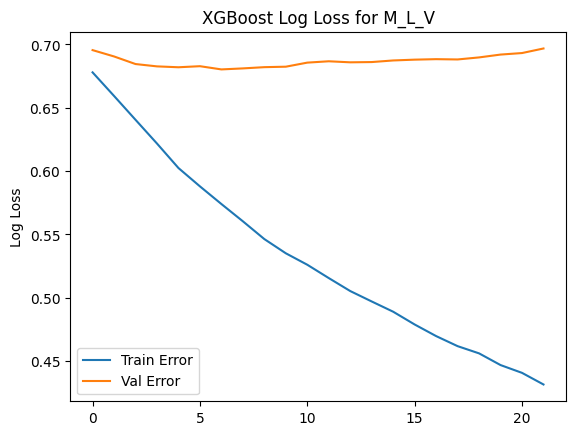

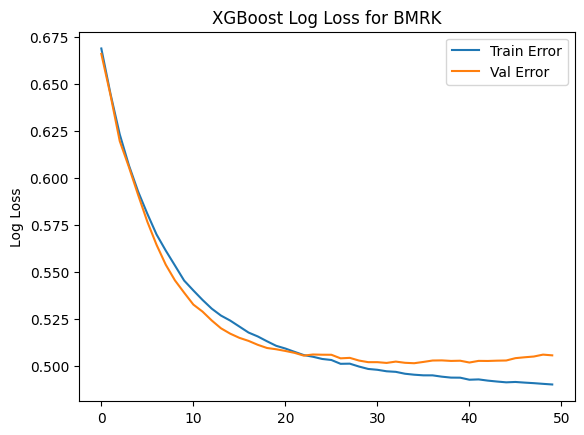

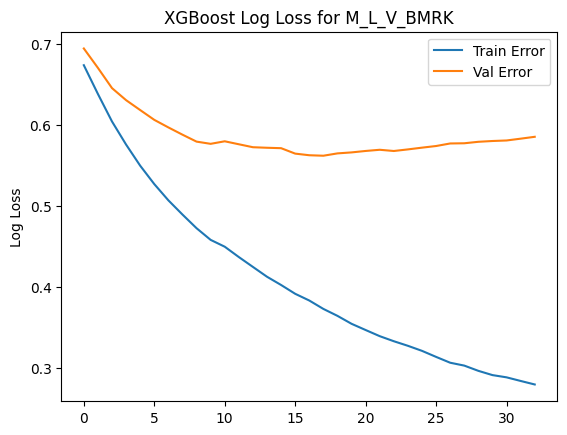

In [7]:
# define dict of model parameters
model_params = {'eval_metric' : eval_metric,
                'scale_pos_weight' : scale_pos_weight,
                'colsample_bytree' : colsample_bytree,
                'gamma' : gamma,
                'lr' : lr,
                'subsample' : subsample, 
                'max_depth_shallow' : max_depth_shallow,
                'max_depth_deep' : max_depth_deep,
                'early_stopping' : early_stopping}


# getmodels, train and test, return pandas of results using k-fold cross validation
# -> if lossFigure and saveModels are True, then figures of training and validation losses and models are saved in ./MOdel/xgboost/
results_fold1  = train_test_xgboost([Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df], Fold1_df , 1,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = True,  exportModels = True)
results_fold2  = train_test_xgboost([Fold1_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df], Fold2_df , 2,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold3  = train_test_xgboost([Fold1_df, Fold2_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df], Fold3_df , 3,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold4  = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df], Fold4_df , 4,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold5  = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df], Fold5_df , 5,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold6  = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold7_df, Fold8_df, Fold9_df, Fold10_df], Fold6_df , 6,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold7  = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold8_df, Fold9_df, Fold10_df], Fold7_df , 7,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold8  = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold9_df, Fold10_df], Fold8_df , 8,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold9  = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold10_df], Fold9_df , 9,  Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)
results_fold10 = train_test_xgboost([Fold1_df, Fold2_df, Fold3_df, Fold4_df, Fold5_df, Fold6_df, Fold7_df, Fold8_df, Fold9_df ], Fold10_df, 10, Test_df, modalities_combinations, model_params, model_folder, lossFigure = False, exportModels = True)


In [8]:
# These lines are inlcuded to show how to load an exported xgboost model for predictions on new data
'''
model_load = XGBClassifier()
model_load.load_model(model_folder + 'BMRK_fold1_model.json')
'''

"\nmodel_load = XGBClassifier()\nmodel_load.load_model(model_folder + 'BMRK_fold1_model.json')\n"

# 3 Results Analysis

In [9]:
# display results per fold
print(f'#######   VAL FOLD: fold 1   ########')
display(results_fold1)

print(f'#######   VAL FOLD: fold 2   ########')
display(results_fold2)

print(f'#######   VAL FOLD: fold 3   ########')
display(results_fold3)

print(f'#######   VAL FOLD: fold 4   ########')
display(results_fold4)

print(f'#######   VAL FOLD: fold 5   ########')
display(results_fold5)

print(f'#######   VAL FOLD: fold 6   ########')
display(results_fold6)

print(f'#######   VAL FOLD: fold 7   ########')
display(results_fold7)

print(f'#######   VAL FOLD: fold 8   ########')
display(results_fold8)

print(f'#######   VAL FOLD: fold 9   ########')
display(results_fold9)

print(f'#######   VAL FOLD: fold 10   ########')
display(results_fold10)

#######   VAL FOLD: fold 1   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.622889,0.619944,0.702222,"[[95, 60], [141, 237]]",0.764861,0.626984,0.612903,0.797980,0.402542,0.219323
BMRK,0.836773,0.844956,0.877637,"[[134, 21], [66, 312]]",0.897172,0.825397,0.864516,0.936937,0.670000,0.647096
M_L_V_BMRK,0.840525,0.838087,0.882434,"[[129, 26], [59, 319]]",0.891010,0.843915,0.832258,0.924638,0.686170,0.642660


#######   VAL FOLD: fold 2   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.667917,0.611726,0.761134,"[[74, 81], [96, 282]]",0.759674,0.746032,0.477419,0.776860,0.435294,0.217729
BMRK,0.834897,0.843634,0.876056,"[[134, 21], [67, 311]]",0.896413,0.822751,0.864516,0.936747,0.666667,0.643977
M_L_V_BMRK,0.831144,0.831473,0.874652,"[[129, 26], [64, 314]]",0.887240,0.830688,0.832258,0.923529,0.668394,0.626429


#######   VAL FOLD: fold 3   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.647280,0.627624,0.730659,"[[90, 65], [123, 255]]",0.768344,0.674603,0.580645,0.796875,0.422535,0.236652
BMRK,0.844278,0.852151,0.883590,"[[135, 20], [63, 315]]",0.901781,0.833333,0.870968,0.940299,0.681818,0.661935
M_L_V_BMRK,0.831144,0.835279,0.873950,"[[131, 24], [66, 312]]",0.890267,0.825397,0.845161,0.928571,0.664975,0.630878


#######   VAL FOLD: fold 4   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.643527,0.615463,0.730878,"[[85, 70], [120, 258]]",0.762016,0.682540,0.548387,0.786585,0.414634,0.215562
BMRK,0.846154,0.855376,0.884831,"[[136, 19], [63, 315]]",0.904127,0.833333,0.877419,0.943114,0.683417,0.667314
M_L_V_BMRK,0.842402,0.841313,0.883657,"[[130, 25], [59, 319]]",0.893278,0.843915,0.838710,0.927326,0.687831,0.648013


#######   VAL FOLD: fold 5   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.684803,0.635049,0.772358,"[[80, 75], [93, 285]]",0.771376,0.753968,0.516129,0.791667,0.462428,0.261974
BMRK,0.842402,0.850828,0.882022,"[[135, 20], [64, 314]]",0.901021,0.830688,0.870968,0.940120,0.678392,0.658773
M_L_V_BMRK,0.855535,0.850572,0.894376,"[[130, 25], [52, 326]]",0.898568,0.862434,0.838710,0.928775,0.714286,0.671474


#######   VAL FOLD: fold 6   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.634146,0.586013,0.731034,"[[73, 82], [113, 265]]",0.747398,0.701058,0.470968,0.763689,0.392473,0.163902
BMRK,0.846154,0.851570,0.885475,"[[134, 21], [61, 317]]",0.900967,0.838624,0.864516,0.937870,0.687179,0.662946
M_L_V_BMRK,0.846154,0.836346,0.887978,"[[126, 29], [53, 325]]",0.888791,0.859788,0.812903,0.918079,0.703911,0.646844


#######   VAL FOLD: fold 7   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.645403,0.592046,0.742156,"[[72, 83], [106, 272]]",0.750212,0.719577,0.464516,0.766197,0.404494,0.177266
BMRK,0.838649,0.846279,0.879213,"[[134, 21], [65, 313]]",0.897931,0.828042,0.864516,0.937126,0.673367,0.650232
M_L_V_BMRK,0.838649,0.832958,0.881543,"[[127, 28], [58, 320]]",0.887265,0.846561,0.819355,0.919540,0.686486,0.635266


#######   VAL FOLD: fold 8   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.656660,0.626626,0.742616,"[[86, 69], [114, 264]]",0.767580,0.698413,0.554839,0.792793,0.430000,0.237534
BMRK,0.834897,0.843634,0.876056,"[[134, 21], [67, 311]]",0.896413,0.822751,0.864516,0.936747,0.666667,0.643977
M_L_V_BMRK,0.833021,0.827087,0.877241,"[[126, 29], [60, 318]]",0.883532,0.841270,0.812903,0.916427,0.677419,0.623280


#######   VAL FOLD: fold 9   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.654784,0.600563,0.750000,"[[73, 82], [102, 276]]",0.754285,0.730159,0.470968,0.770950,0.417143,0.194500
BMRK,0.840525,0.849505,0.880450,"[[135, 20], [65, 313]]",0.900261,0.828042,0.870968,0.939940,0.675000,0.655629
M_L_V_BMRK,0.829268,0.816829,0.875513,"[[122, 33], [58, 320]]",0.876239,0.846561,0.787097,0.906516,0.677778,0.608475


#######   VAL FOLD: fold 10   ########


,Accuracy,ROC AUC,F1 score,Confusion Matrix,Average Precision,TPR,TNR,PPV,NPV,MCC
Modalities,,,,,,,,,,
M_L_V,0.626642,0.611171,0.711176,"[[89, 66], [133, 245]]",0.760130,0.648148,0.574194,0.787781,0.400901,0.204822
BMRK,0.842402,0.847022,0.882682,"[[133, 22], [62, 316]]",0.897889,0.835979,0.858065,0.934911,0.682051,0.654369
M_L_V_BMRK,0.808630,0.790860,0.860656,"[[116, 39], [63, 315]]",0.859724,0.833333,0.748387,0.889831,0.648045,0.559368


In [10]:
# Average performance scores over 5 folds and split per feature used
results = pd.concat([results_fold1, results_fold2, results_fold3, results_fold4, results_fold5, results_fold6, results_fold7, results_fold8, results_fold9, results_fold10])

modalities = list(set(results.index.tolist()))

for modality in modalities:
    results_summary = pd.concat([results['Accuracy'].loc[modality].describe(), results['ROC AUC'].loc[modality].describe(), results['F1 score'].loc[modality].describe()], axis=1)
    results_summary.columns = ['Accuracy', 'ROC AUC', 'F1 score']
    print(f'#######   AVG OVER 10 FOLDS: {modality}    ########')
    display(results_summary.iloc[1:3])

#######   AVG OVER 10 FOLDS: M_L_V    ########


,Accuracy,ROC AUC,F1 score
mean,0.648405,0.612622,0.737423
std,0.018787,0.015866,0.021207


#######   AVG OVER 10 FOLDS: M_L_V_BMRK    ########


,Accuracy,ROC AUC,F1 score
mean,0.835647,0.830080,0.879200
std,0.012483,0.016362,0.009145


#######   AVG OVER 10 FOLDS: BMRK    ########


,Accuracy,ROC AUC,F1 score
mean,0.840713,0.848495,0.880801
std,0.004283,0.003993,0.003473


In [11]:
for modality in modalities:
    results_summary = pd.concat([results[m].loc[modality].describe() for m in ['ROC AUC', 'Average Precision', 'TPR', 'TNR', 'PPV', 'NPV', 'F1 score', 'MCC']], axis=1)
    results_summary.columns = ['AUC', 'Average Precision', 'TPR', 'TNR', 'PPV', 'NPV', 'F1 score', 'MCC']
    print(f'#######   AVG OVER 10 FOLDS: {modality}    ########')
    display(results_summary.iloc[1:3])

#######   AVG OVER 10 FOLDS: M_L_V    ########


,AUC,Average Precision,TPR,TNR,PPV,NPV,F1 score,MCC
mean,0.612622,0.760588,0.698148,0.527097,0.783138,0.418244,0.737423,0.212926
std,0.015866,0.007945,0.041182,0.054239,0.012744,0.020587,0.021207,0.029298


#######   AVG OVER 10 FOLDS: M_L_V_BMRK    ########


,AUC,Average Precision,TPR,TNR,PPV,NPV,F1 score,MCC
mean,0.830080,0.885591,0.843386,0.816774,0.918323,0.681529,0.879200,0.629269
std,0.016362,0.010828,0.011752,0.029518,0.012105,0.019028,0.009145,0.029855


#######   AVG OVER 10 FOLDS: BMRK    ########


,AUC,Average Precision,TPR,TNR,PPV,NPV,F1 score,MCC
mean,0.848495,0.899398,0.829894,0.867097,0.938381,0.676456,0.880801,0.654625
std,0.003993,0.002605,0.005443,0.005440,0.002423,0.007244,0.003473,0.008197


# 4 Feature Importance

In [15]:
model_load = XGBClassifier()
model_load.load_model(model_folder + 'M_L_V_fold2_model.json')
# Feature importances from the trained XGBoost model
feature_importances = model_load.feature_importances_
important_features = pd.DataFrame({
    'Feature': modalities_combinations[0][0],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

important_features

,Feature,Importance
3,Urea_Nitrogren_mean,0.180336
6,Phosphate_mean,0.124849
1,Chloride_mean,0.121798
0,age_label,0.118859
4,Magnesium_mean,0.118771
2,RR_mean,0.113825
7,Hematocrit_mean,0.111630
5,Glucose_mean,0.109933


In [16]:
model_load = XGBClassifier()
model_load.load_model(model_folder + 'BMRK_fold9_model.json')
# Feature importances from the trained XGBoost model
feature_importances = model_load.feature_importances_
important_features = pd.DataFrame({
    'Feature': modalities_combinations[1][0],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

important_features.head(10)

,Feature,Importance
0,CTR,0.577039
1,CPAR,0.422961


In [17]:
model_load = XGBClassifier()
model_load.load_model(model_folder + 'M_L_V_BMRK_fold2_model.json')
# Feature importances from the trained XGBoost model
feature_importances = model_load.feature_importances_
important_features = pd.DataFrame({
    'Feature': modalities_combinations[2][0],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

important_features

,Feature,Importance
8,CTR,0.238085
9,CPAR,0.175072
3,Urea_Nitrogren_mean,0.089225
2,RR_mean,0.075923
4,Magnesium_mean,0.075568
5,Glucose_mean,0.071072
7,Hematocrit_mean,0.070296
1,Chloride_mean,0.069045
0,age_label,0.068256
6,Phosphate_mean,0.067459


```
urea nitrogen:  (kidney)
magnesium:      (heart)
resting rate:   (heart)
hematocrit:     (same as heamoglobin: (RBCs))
chloride:       (nephrology)
phosphate:      (long-term organ damage)
glucose:        (diabetes / altered mental status / seizures)
```